##Using Machine Learning to Predict the Position of a Footballer based on attritubes

###importing the requisite libraries

In [147]:
library(randomForest)
library('e1071')
library(caret)
library(tidyverse)

In [89]:
df<-read.csv(file.choose(), header=T)

In [ ]:
##Checking for na(s)

In [92]:
sum(is.na(df))


[1] 12792

##Removing the NA(s)

In [93]:
df<-na.omit(df)

#Rechecking for NA(s)

In [94]:
sum(is.na(df))


[1] 0

In [95]:
head(df)

,club_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot,league_name
1,RW,85,92,91,95,34,65,85,95,70,...,20,35,24,6,11,15,14,8,Left,French Ligue 1
2,ST,78,92,79,86,44,82,71,95,90,...,35,42,19,15,6,12,8,10,Right,German 1. Bundesliga
3,ST,87,94,80,88,34,75,87,95,90,...,24,32,24,7,11,15,14,11,Right,English Premier League
4,LW,91,83,86,94,37,63,85,83,63,...,35,32,29,9,9,15,15,11,Right,French Ligue 1
5,RCM,76,86,93,88,64,78,94,82,55,...,68,65,53,15,13,5,10,13,Right,English Premier League
7,ST,97,88,80,92,36,77,78,93,72,...,26,34,32,13,5,7,11,6,Right,French Ligue 1


In [96]:
str(df$club_position)

 Factor w/ 30 levels "","CAM","CB",..: 27 29 29 16 21 29 29 21 5 16 ...


In [ ]:
###Removing positions that are not relevant to the analysis

In [97]:
df<-df %>% 
filter(club_position!="SUB") %>% 
filter(club_position!="RES") %>% 
drop_na()

##Let us categorize the positions into real life actual positions. Mutate to the rescue

In [98]:
df1<-df %>% 
mutate(position=
      case_when(club_position== "CF" ~ "Striker",
               club_position=="RW"~"Winger",
                club_position=="LM"~"Winger",
                 club_position=="RM"~"Winger",
               club_position=="LW"~"Winger",
               club_position=="LF"~"Striker",
               club_position=="RF"~"Striker",
               club_position=="ST"~"Striker",
               club_position=="LS"~"Striker",
               club_position=="RS"~"Striker",
               club_position=="CDM"~"Defensive_Midfield",
               club_position=="CDM"~"Defensive_Midfield",
               club_position=="CAM"~"Attacking_Midfield",
               club_position=="LDM"~"Defensive_Midfield",
               club_position=="RDM"~"Defensive_Midfield",
               club_position=="RCM"~"Central_Midfield",
               club_position=="LCM"~"Central_Midfield",
               club_position=="RCM"~"Central_Midfield",
               club_position=="LDM"~"Defensive_Midfield",
               club_position=="LAM"~"Attacking_Midfield",
               club_position=="RAM"~"Attacking_Midfield",
               club_position=="CB"~"Defender",
               club_position=="RCB"~"Defender",
               club_position=="LCB"~"Defender",
               club_position=="RB"~"Right_Back",
               club_position=="RWB"~"Right_Back",
               club_position=="LB"~"Left_Back",
               club_position=="LWB"~"Left_Back",
               club_position=="GK"~"Goalie"))
            

In [99]:
df1<-df1 %>% 
select(-league_name)

###Checking the class of position

In [100]:
str(df1$position)

 chr [1:7063] "Winger" "Striker" "Striker" "Winger" "Central_Midfield" ...


##Change to a factor

In [101]:
df1$position<-as.factor(df1$position)

In [ ]:
###Lets start with random seed so the outcome will be repeatable and store train and test data. Splitting 70-30

In [102]:

set.seed(222)
ind <- sample(2, nrow(df1), replace = TRUE, prob = c(0.7, 0.3))
train <- df1[ind==1,]
test <- df1[ind==2,]


In [103]:
test<-na.omit(test)

In [104]:
dim(test)

[1] 2047   43

In [105]:
train<-na.omit(train)

In [106]:
dim(train)

[1] 4880   43

In [ ]:
###Time to run the model on the train data

In [144]:
rf <- randomForest(factor(position)~., data=train, importance=TRUE,proximity=TRUE) 

In [145]:
rf



Call:
 randomForest(formula = factor(position) ~ ., data = train, importance = TRUE,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 6

        OOB estimate of  error rate: 2.03%
Confusion matrix:
                   Attacking_Midfield Central_Midfield Defender
Attacking_Midfield                214                4        1
Central_Midfield                    2              632        4
Defender                            0                0     1102
Defensive_Midfield                  3                1        4
Left_Back                           0                1        0
Right_Back                          1                1        1
Striker                             1               10        0
Winger                              0                0        9
                   Defensive_Midfield Left_Back Right_Back Striker Winger
Attacking_Midfield                  5      

In [112]:
install.packages('e1071', dependencies=TRUE)

also installing the dependencies 'SparseM', 'slam'




  There are binary versions available but the source versions are later:
      binary source needs_compilation
slam  0.1-48 0.1-50              TRUE
e1071  1.7-6  1.7-9              TRUE

  Binaries will be installed
package 'SparseM' successfully unpacked and MD5 sums checked
package 'slam' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\patri\AppData\Local\Temp\Rtmp61EPdJ\downloaded_packages


In [123]:
p1 <- predict(rf, train)
confusionMatrix(p1, train$ position)

Confusion Matrix and Statistics

                    Reference
Prediction           Attacking_Midfield Central_Midfield Defender
  Attacking_Midfield                238                0        0
  Central_Midfield                    0              645        0
  Defender                            0                0     1105
  Defensive_Midfield                  0                0        0
  Left_Back                           0                0        0
  Right_Back                          0                0        0
  Striker                             0                0        0
  Winger                              0                0        0
                    Reference
Prediction           Defensive_Midfield Left_Back Right_Back Striker Winger
  Attacking_Midfield                  0         0          0       0      0
  Central_Midfield                    0         0          0       0      0
  Defender                            0         0          0       0      0
  Defensi

In [124]:
p2 <- predict(rf, test)
confusionMatrix(p2, test$ position)

Confusion Matrix and Statistics

                    Reference
Prediction           Attacking_Midfield Central_Midfield Defender
  Attacking_Midfield                 89                0        0
  Central_Midfield                    1              292        1
  Defender                            1                0      482
  Defensive_Midfield                  1                0        0
  Left_Back                           0                1        0
  Right_Back                          0                0        0
  Striker                             2                2        0
  Winger                              2                0        0
                    Reference
Prediction           Defensive_Midfield Left_Back Right_Back Striker Winger
  Attacking_Midfield                  0         0          0       0      0
  Central_Midfield                    0         0          0       4      0
  Defender                            0         0          0       1      2
  Defensi

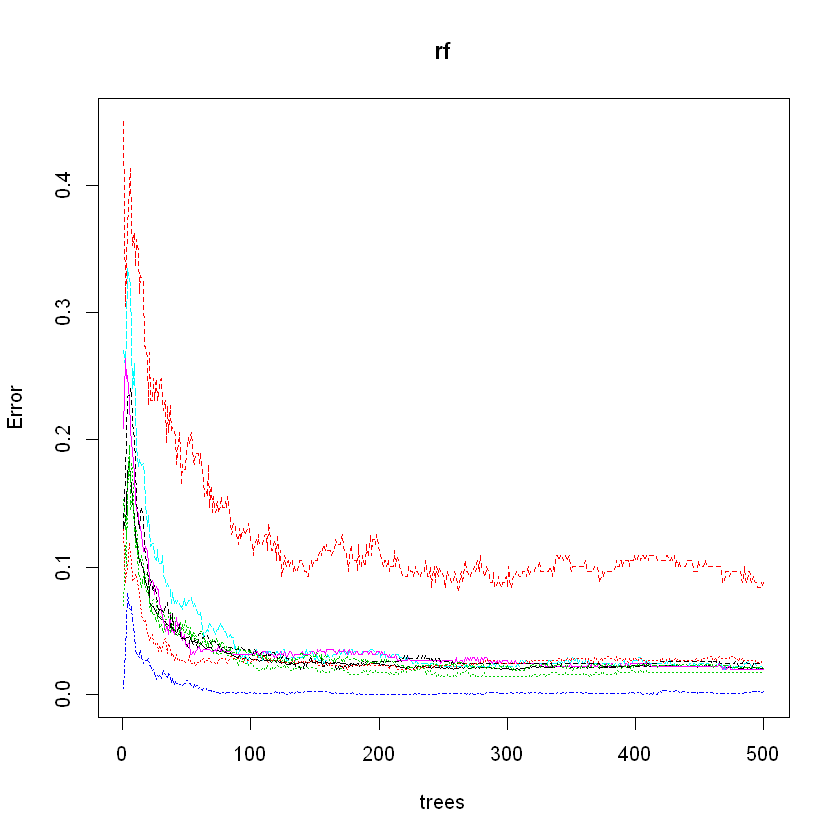

In [125]:
plot(rf)

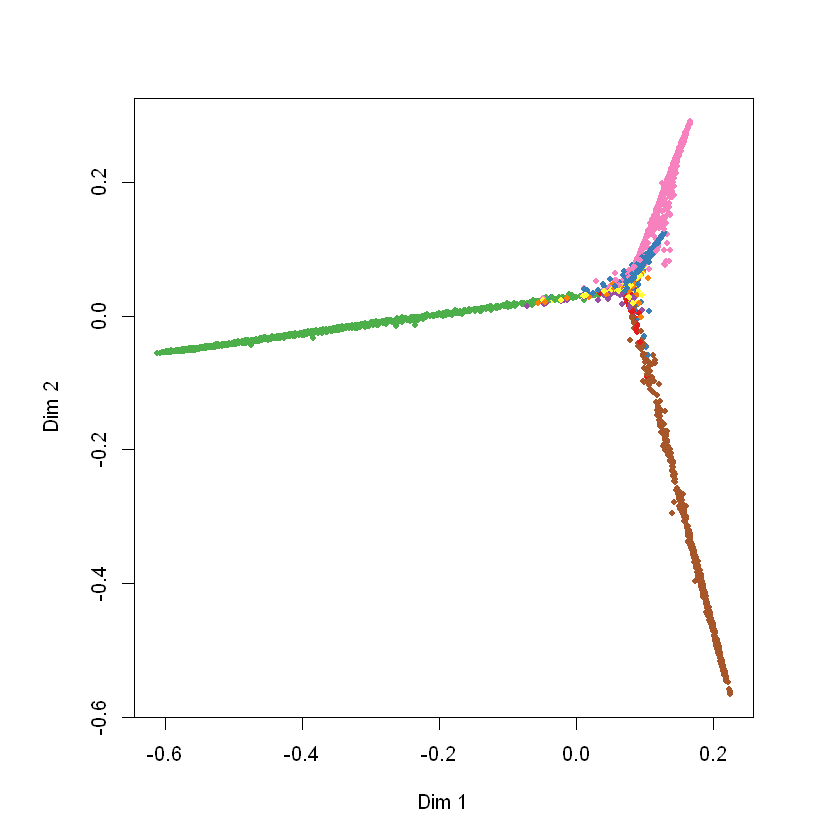

In [118]:
MDSplot(rf, train$position)

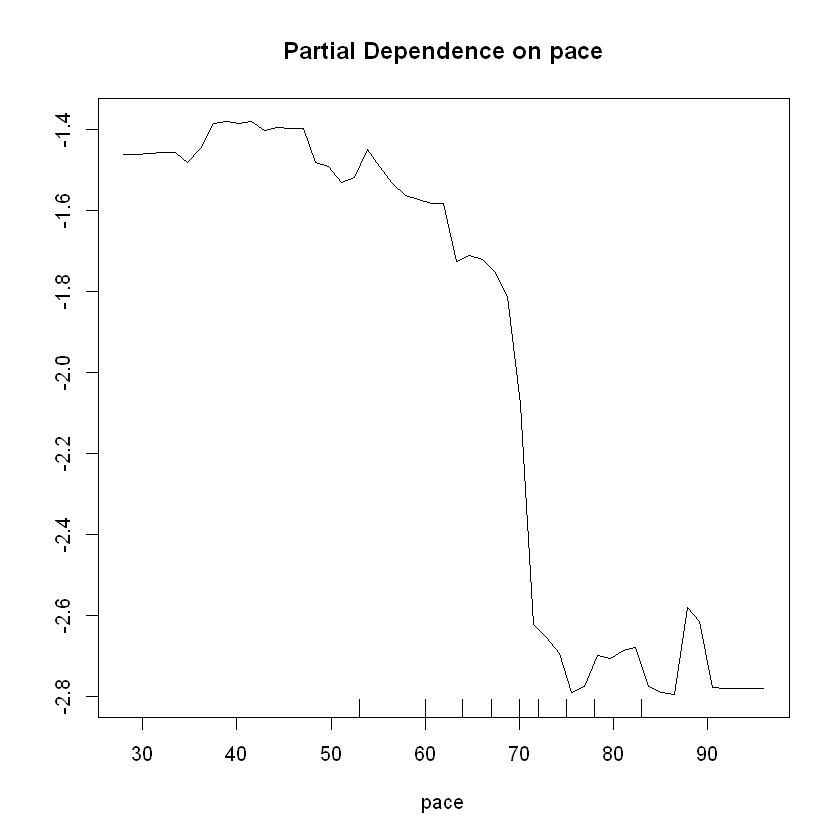

In [132]:
partialPlot(rf, train, pace, "Defender")